#  Import libraries and read the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report


data = pd.read_csv('diabetes.csv')


#  Visualize pairwise scatter plots



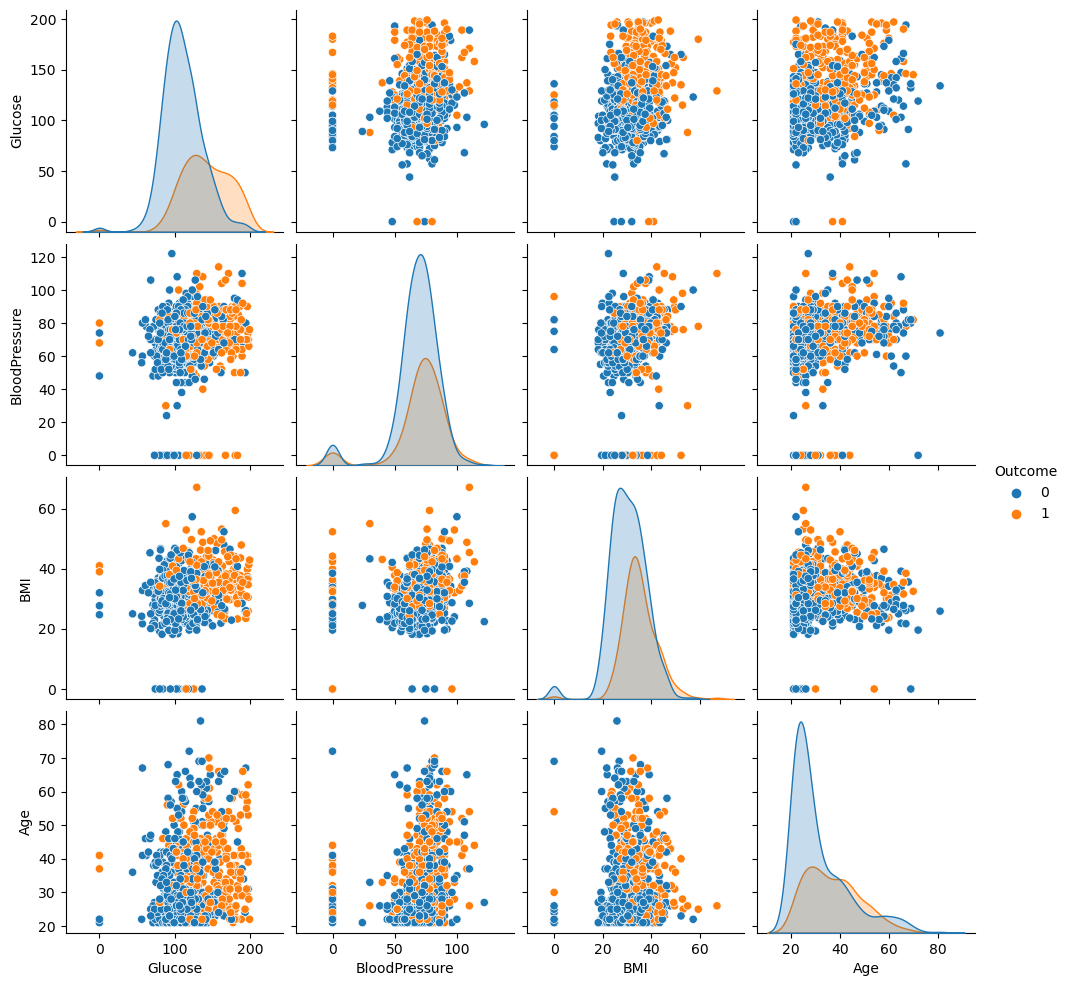

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_features = ['Glucose', 'BloodPressure', 'BMI', 'Age']
sns.pairplot(data, vars=selected_features, hue='Outcome')
plt.show()


#  Preprocess the data



In [3]:
input_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target_variable = 'Outcome'

# Check if there are any missing values in the dataset
print("Number of missing values in each feature:")
print(data.isnull().sum())

# Replace missing values with the mean of the respective feature
data.fillna(data.mean(), inplace=True)

X = data[input_features]
y = data[target_variable]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Number of missing values in each feature:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#  Make pipelines



In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression())
])


# Set up hyperparameter grids for grid search and implement 

In [5]:
#The first parameter grid is for tuning hyperparameters of
#a Support Vector Machine (SVM) model, with two hyperparameters being tuned: C 
#and kernel. C is a regularization parameter that controls the trade-off between
#achieving a low training error and a low testing error, 
#and kernel specifies the type of kernel function to be used in the SVM algorithm
#which can be either 'linear' or 'rbf' (Radial Basis Function).


svm_param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf']
}

#The second parameter grid is for tuning hyperparameters of a Logistic Regression (LR) model,
#with two hyperparameters being tuned: C and solver. C is again a regularization parameter as in SVM,
#and solver specifies the algorithm to be used in the optimization problem of 
#finding the optimal parameters for the logistic regression model. In this case,
#the available options are 'newton-cg' and 'lbfgs'.

lr_param_grid = {
    'logistic_regression__C': [0.1, 1, 10],
    'logistic_regression__solver': ['newton-cg', 'lbfgs']
}
from sklearn.model_selection import GridSearchCV

svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=3)
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=3)

svm_grid_search.fit(X_train, y_train)
lr_grid_search.fit(X_train, y_train)



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic_regression',
                                        LogisticRegression())]),
             param_grid={'logistic_regression__C': [0.1, 1, 10],
                         'logistic_regression__solver': ['newton-cg', 'lbfgs']})

# Print best parameters and evaluate the models

In [6]:
print("Best parameters for SVM:", svm_grid_search.best_params_)
print("Best parameters for logistic regression:", lr_grid_search.best_params_)

svm_score = svm_grid_search.score(X_test, y_test)
lr_score = lr_grid_search.score(X_test, y_test)

print("SVM test score:", svm_score)
print("Logistic Regression test score:", lr_score)

y_pred_svm = svm_grid_search.predict(X_test)
y_pred_LR = lr_grid_search.predict(X_test)

print (classification_report(y_test,y_pred_svm))
print (classification_report(y_test,y_pred_LR))

Best parameters for SVM: {'svm__C': 0.1, 'svm__kernel': 'linear'}
Best parameters for logistic regression: {'logistic_regression__C': 0.1, 'logistic_regression__solver': 'newton-cg'}
SVM test score: 0.7489177489177489
Logistic Regression test score: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.62      0.63        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



# Visualize confusion matrices side by side

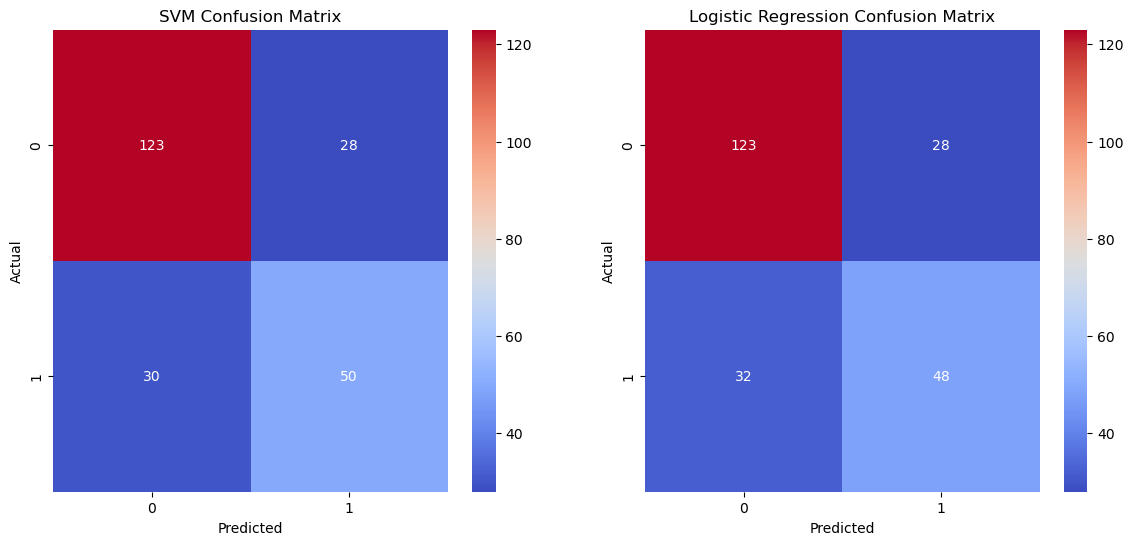

In [7]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrices
svm_cm = confusion_matrix(y_test, svm_grid_search.predict(X_test))
lr_cm = confusion_matrix(y_test, lr_grid_search.predict(X_test))

# Visualize confusion matrices side by side
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# SVM confusion matrix
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='coolwarm', ax=ax1)
ax1.set_title('SVM Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Logistic Regression confusion matrix
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='coolwarm', ax=ax2)
ax2.set_title('Logistic Regression Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.show()


# Using everything with PCA 

In [8]:
from sklearn.decomposition import PCA

svm_pipeline = Pipeline([
    ('pca', PCA(n_components=7)),  
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

lr_pipeline = Pipeline([
    ('pca', PCA(n_components=7)),  
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression())
])

In [9]:
svm_param_grid = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf']
}

lr_param_grid = {
    'logistic_regression__C': [0.1, 1, 10],
    'logistic_regression__solver': ['newton-cg', 'lbfgs']
}
from sklearn.model_selection import GridSearchCV

svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=3)
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=3)

svm_grid_search.fit(X_train, y_train)
lr_grid_search.fit(X_train, y_train)



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(n_components=7)),
                                       ('scaler', StandardScaler()),
                                       ('logistic_regression',
                                        LogisticRegression())]),
             param_grid={'logistic_regression__C': [0.1, 1, 10],
                         'logistic_regression__solver': ['newton-cg', 'lbfgs']})

In [10]:
print("Best parameters for SVM:", svm_grid_search.best_params_)
print("Best parameters for logistic regression:", lr_grid_search.best_params_)

svm_score = svm_grid_search.score(X_test, y_test)
lr_score = lr_grid_search.score(X_test, y_test)

print("SVM test score:", svm_score)
print("Logistic Regression test score:", lr_score)
y_pred_svm = svm_grid_search.predict(X_test)
y_pred_LR = lr_grid_search.predict(X_test)
print (classification_report(y_test,y_pred_svm))
print (classification_report(y_test,y_pred_LR))

Best parameters for SVM: {'svm__C': 0.1, 'svm__kernel': 'linear'}
Best parameters for logistic regression: {'logistic_regression__C': 1, 'logistic_regression__solver': 'newton-cg'}
SVM test score: 0.7402597402597403
Logistic Regression test score: 0.7186147186147186
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       151
           1       0.59      0.60      0.60        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



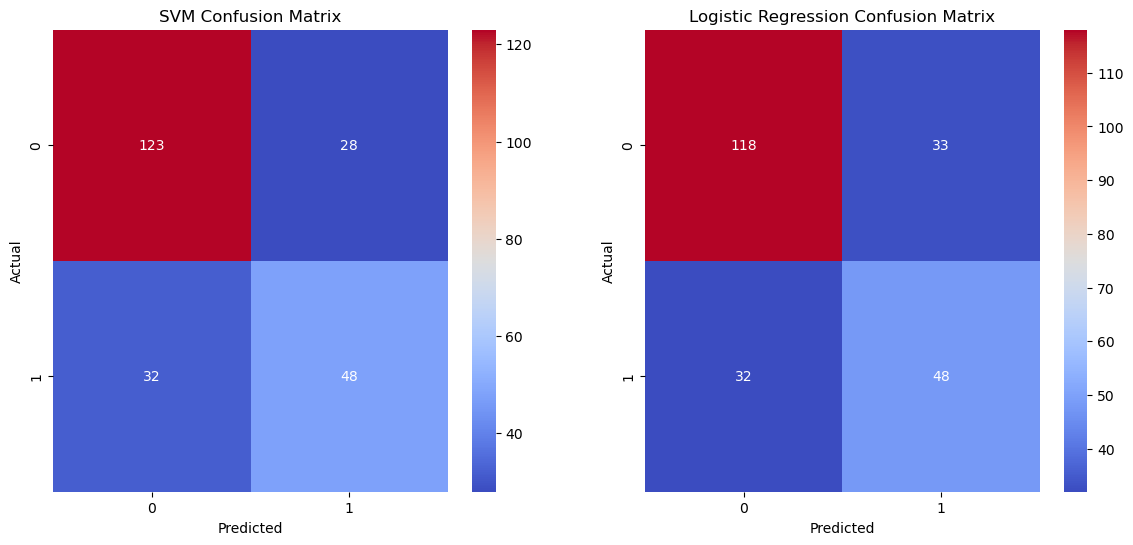

In [11]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrices
svm_cm = confusion_matrix(y_test, svm_grid_search.predict(X_test))
lr_cm = confusion_matrix(y_test, lr_grid_search.predict(X_test))

# Visualize confusion matrices side by side
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# SVM confusion matrix
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='coolwarm', ax=ax1)
ax1.set_title('SVM Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Logistic Regression confusion matrix
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='coolwarm', ax=ax2)
ax2.set_title('Logistic Regression Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.show()
